### Import of json files with tweet data

In [12]:
import json

tweet_files = ['#NetNeutrality/#NetNeutrality_2018-01-22.json', 'net/net_2018-01-22.json', '#NetNeutrality/#NetNeutrality_2018-01-23.json', 'net/net_2018-01-23.json', '#NetNeutrality/#NetNeutrality_2018-01-24.json', 'net/net_2018-01-24.json', '#NetNeutrality/#NetNeutrality_2018-01-25.json', 'net/net_2018-01-25.json', '#NetNeutrality/#NetNeutrality_2018-01-26.json', 'net/net_2018-01-26.json', '#NetNeutrality/#NetNeutrality_2018-01-27.json', 'net/net_2018-01-27.json', '#NetNeutrality/#NetNeutrality_2018-01-28.json', 'net/net_2018-01-28.json', '#NetNeutrality/#NetNeutrality_2018-01-29.json', 'net/net_2018-01-29.json', '#NetNeutrality/#NetNeutrality_2018-01-30.json', 'net/net_2018-01-30.json', '#NetNeutrality/#NetNeutrality_2018-01-31.json', 'net/net_2018-01-31.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

### Data Wrangling

#### Investigate fields of a tweet

In [43]:
print(tweets[0])

{'created_at': 'Mon Jan 22 23:59:48 +0000 2018', 'id': 955590854734958592, 'id_str': '955590854734958592', 'text': 'RT @MatthewBender9: #NetNeutrality How it’s going to look like https://t.co/sFqFXWVnOz', 'truncated': False, 'entities': {'hashtags': [{'text': 'NetNeutrality', 'indices': [20, 34]}], 'symbols': [], 'user_mentions': [{'screen_name': 'MatthewBender9', 'name': 'Ghillie', 'id': 2425832674, 'id_str': '2425832674', 'indices': [3, 18]}], 'urls': [], 'media': [{'id': 941417228330766337, 'id_str': '941417228330766337', 'indices': [63, 86], 'media_url': 'http://pbs.twimg.com/media/DRCV-zgWkAE7eaB.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DRCV-zgWkAE7eaB.jpg', 'url': 'https://t.co/sFqFXWVnOz', 'display_url': 'pic.twitter.com/sFqFXWVnOz', 'expanded_url': 'https://twitter.com/MatthewBender9/status/941417235545018370/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1200, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, '

#### Definition of fields to be created in dataframe from json files

In [13]:
import pandas as pd

def populate_tweet_df(tweets):
    df = pd.DataFrame()
    df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets))                
    df['tweet_date'] = list(map(lambda tweet: tweet['created_at'], tweets))
    df['user_id'] = list(map(lambda tweet: tweet['user']['id'], tweets))                      
    df['screen_name'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets))                
    df['name'] = list(map(lambda tweet: tweet['user']['name'], tweets))               
    df['description'] = list(map(lambda tweet: tweet['user']['description'], tweets))                
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
    df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))
    df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))               
    df['user_location'] = list(map(lambda tweet: tweet['user']['location'] 
                        if tweet['place'] != None else '', tweets))
    df['tweet_location'] = list(map(lambda tweet: tweet['place']['name'] 
                        if tweet['place'] != None else '', tweets))
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    return df

In [14]:
# Create pandas dataframe
df = populate_tweet_df(tweets)

In [15]:
df.shape

(207250, 13)

In [16]:
df.tweet_id.nunique()

190723

In [17]:
# Remove duplicate tweets
df = df.drop_duplicates(["tweet_id"])
df.shape

(190723, 13)

In [18]:
# Look at data types
df.dtypes

tweet_id           int64
tweet_date        object
user_id            int64
screen_name       object
name              object
description       object
text              object
retweet_count      int64
favorite_count     int64
user_location     object
tweet_location    object
long              object
latt              object
dtype: object

In [19]:
# Convert tweet date to a datetime object
df['tweet_date'] = pd.to_datetime(df['tweet_date'],  errors='raise')
df.dtypes

tweet_id                   int64
tweet_date        datetime64[ns]
user_id                    int64
screen_name               object
name                      object
description               object
text                      object
retweet_count              int64
favorite_count             int64
user_location             object
tweet_location            object
long                      object
latt                      object
dtype: object

## Exploratory Data Analysis

In [24]:
%matplotlib inline 
import nltk
import string
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [20]:
df.head()

,tweet_id,tweet_date,user_id,screen_name,name,description,text,retweet_count,favorite_count,user_location,tweet_location,long,latt
0,955590854734958592,2018-01-22 23:59:48,813084079180709888,SamanthaRblxYT,sam🦄,I LOVE MA GURPS!! @YourLilPotato & @Little_Sno...,RT @MatthewBender9: #NetNeutrality How it’s go...,1291,0,,,NaN,NaN
1,955590762271526912,2018-01-22 23:59:26,830465545275371521,margeholmes6162,Marj,,RT @DeadpoolResists: Montana becomes first sta...,475,0,,,NaN,NaN
2,955590754033946634,2018-01-22 23:59:24,3246707126,AllMghtyLantern,AllMightyLantern,"Lover of all things comics, games, animation, ...",RT @fightfortheftr: We are ONE VOTE AWAY from ...,839,0,,,NaN,NaN
3,955590534789124096,2018-01-22 23:58:32,786420072730333184,pyrrpro55,Pyrrhis Productions,Formerly Simulation Studios!,RT @freepress: Don't be fooled: Your activism ...,35,0,,,NaN,NaN
4,955590495950041088,2018-01-22 23:58:22,1603164476,bzaenglein,Barbara Zaenglein,#Resist #Notmypresident. #NetNeutrality #Pence...,RT @freepress: We're suing the FCC to save #Ne...,36,0,,,NaN,NaN


In [38]:
df.tail()

,tweet_id,tweet_date,user_id,screen_name,name,description,text,retweet_count,favorite_count,user_location,tweet_location,long,latt
207244,958490109841756166,2018-01-31 00:00:24,822474099825836035,IsabellaLitchka,Isabella L,"Grandmother, retired educator, dog lover, inde...",RT @thomaskaine5: TRUMP PUTIN PLAN for USA?: ...,208,0,,,NaN,NaN
207245,958490099796324352,2018-01-31 00:00:22,938969729636630529,BiddulphHarold,harold biddulph,,RT @thomaskaine5: TRUMP PUTIN PLAN for USA?: ...,208,0,,,NaN,NaN
207247,958490038215438337,2018-01-31 00:00:07,2320715947,Andyrguapo,Andy Rodriguez 🌻,"Likes Janet Devlin, Ozomatli, Paolo Nutini, Li...",RT @philosophrob: Why isn't @RepJoeKennedy sup...,300,0,,,NaN,NaN
207248,958490022826708992,2018-01-31 00:00:03,901803354489315328,ExitioRegem,ExitioRegem,I'm a gamer who doesn't know how to social med...,@bbanahan20 They overreacted because Net Neutr...,0,0,,,NaN,NaN
207249,958490011153788928,2018-01-31 00:00:01,1631780510,IAgreeToSee,I Agree To See,Billions are spent on political ads to influen...,In the sequel to their first amazing viral vid...,0,0,,,NaN,NaN


In [22]:
# Let's look at the date range we have here
print("Earliest Tweet", df['tweet_date'].min())
print("Latest Tweet", df['tweet_date'].max())

Earliest Tweet 2018-01-22 00:00:02
Latest Tweet 2018-01-31 20:09:22


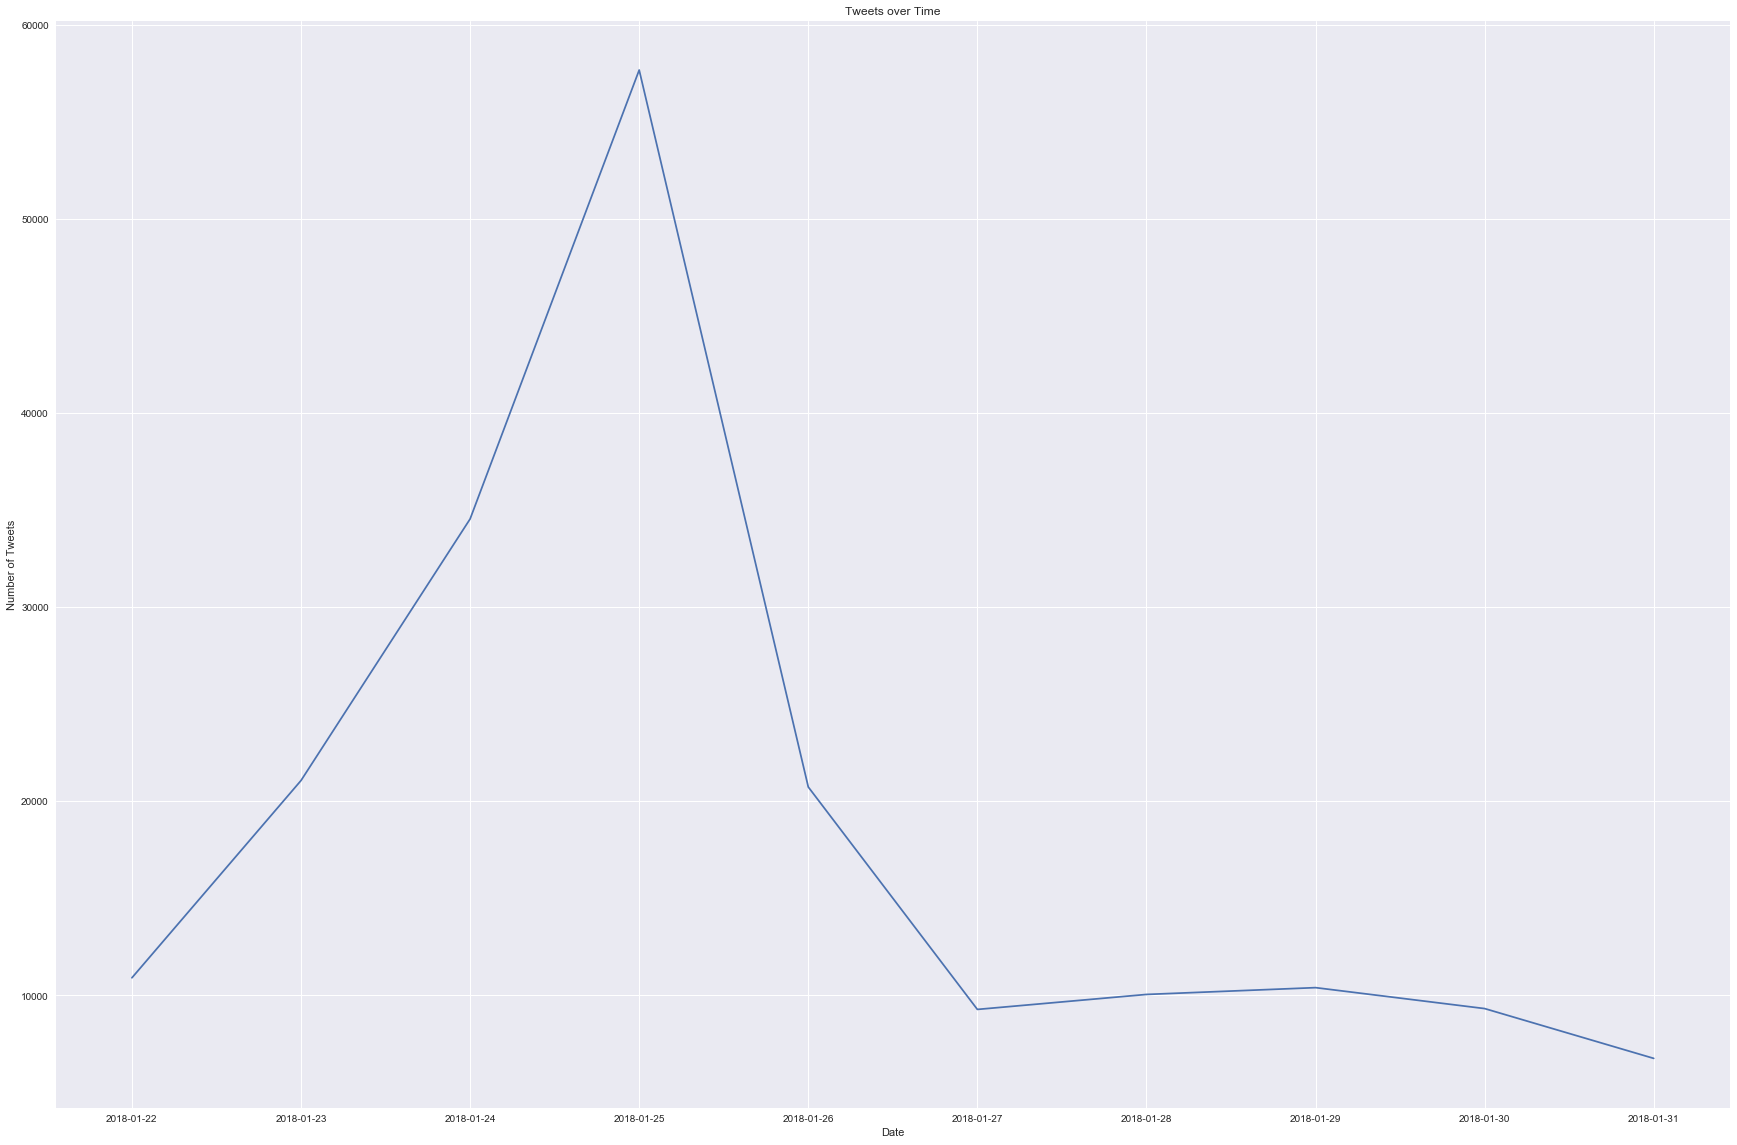

In [46]:
df.groupby(df['tweet_date'].dt.date).size().plot()
plt.title('Tweets over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

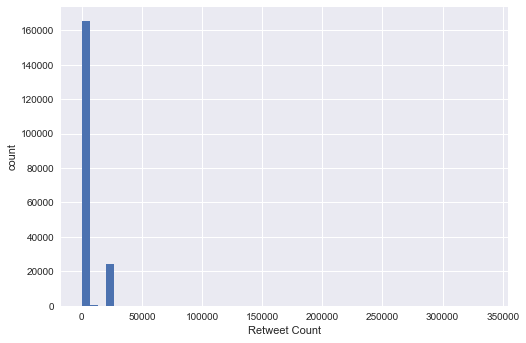

In [30]:
sns.set()
n_data = len(df.retweet_count)
n_bins = 50
n_bins = int(n_bins)
plt.hist(df.retweet_count, bins = n_bins)
plt.xlabel('Retweet Count')
plt.ylabel('count')
plt.show()

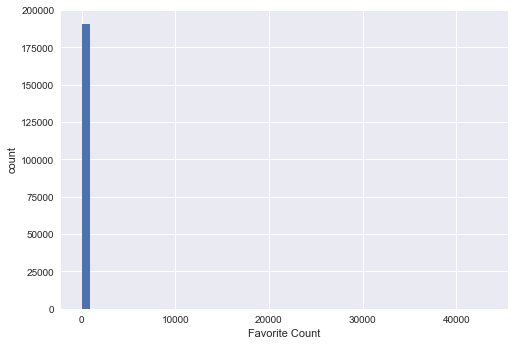

In [37]:
sns.set()
n_data = len(df.favorite_count)
n_bins = 50
n_bins = int(n_bins)
plt.hist(df.favorite_count, bins = n_bins)
plt.xlabel('Favorite Count')
plt.ylabel('count')
plt.show()

In [41]:
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df['text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)

rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

rslt = rslt.iloc[2:]

/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


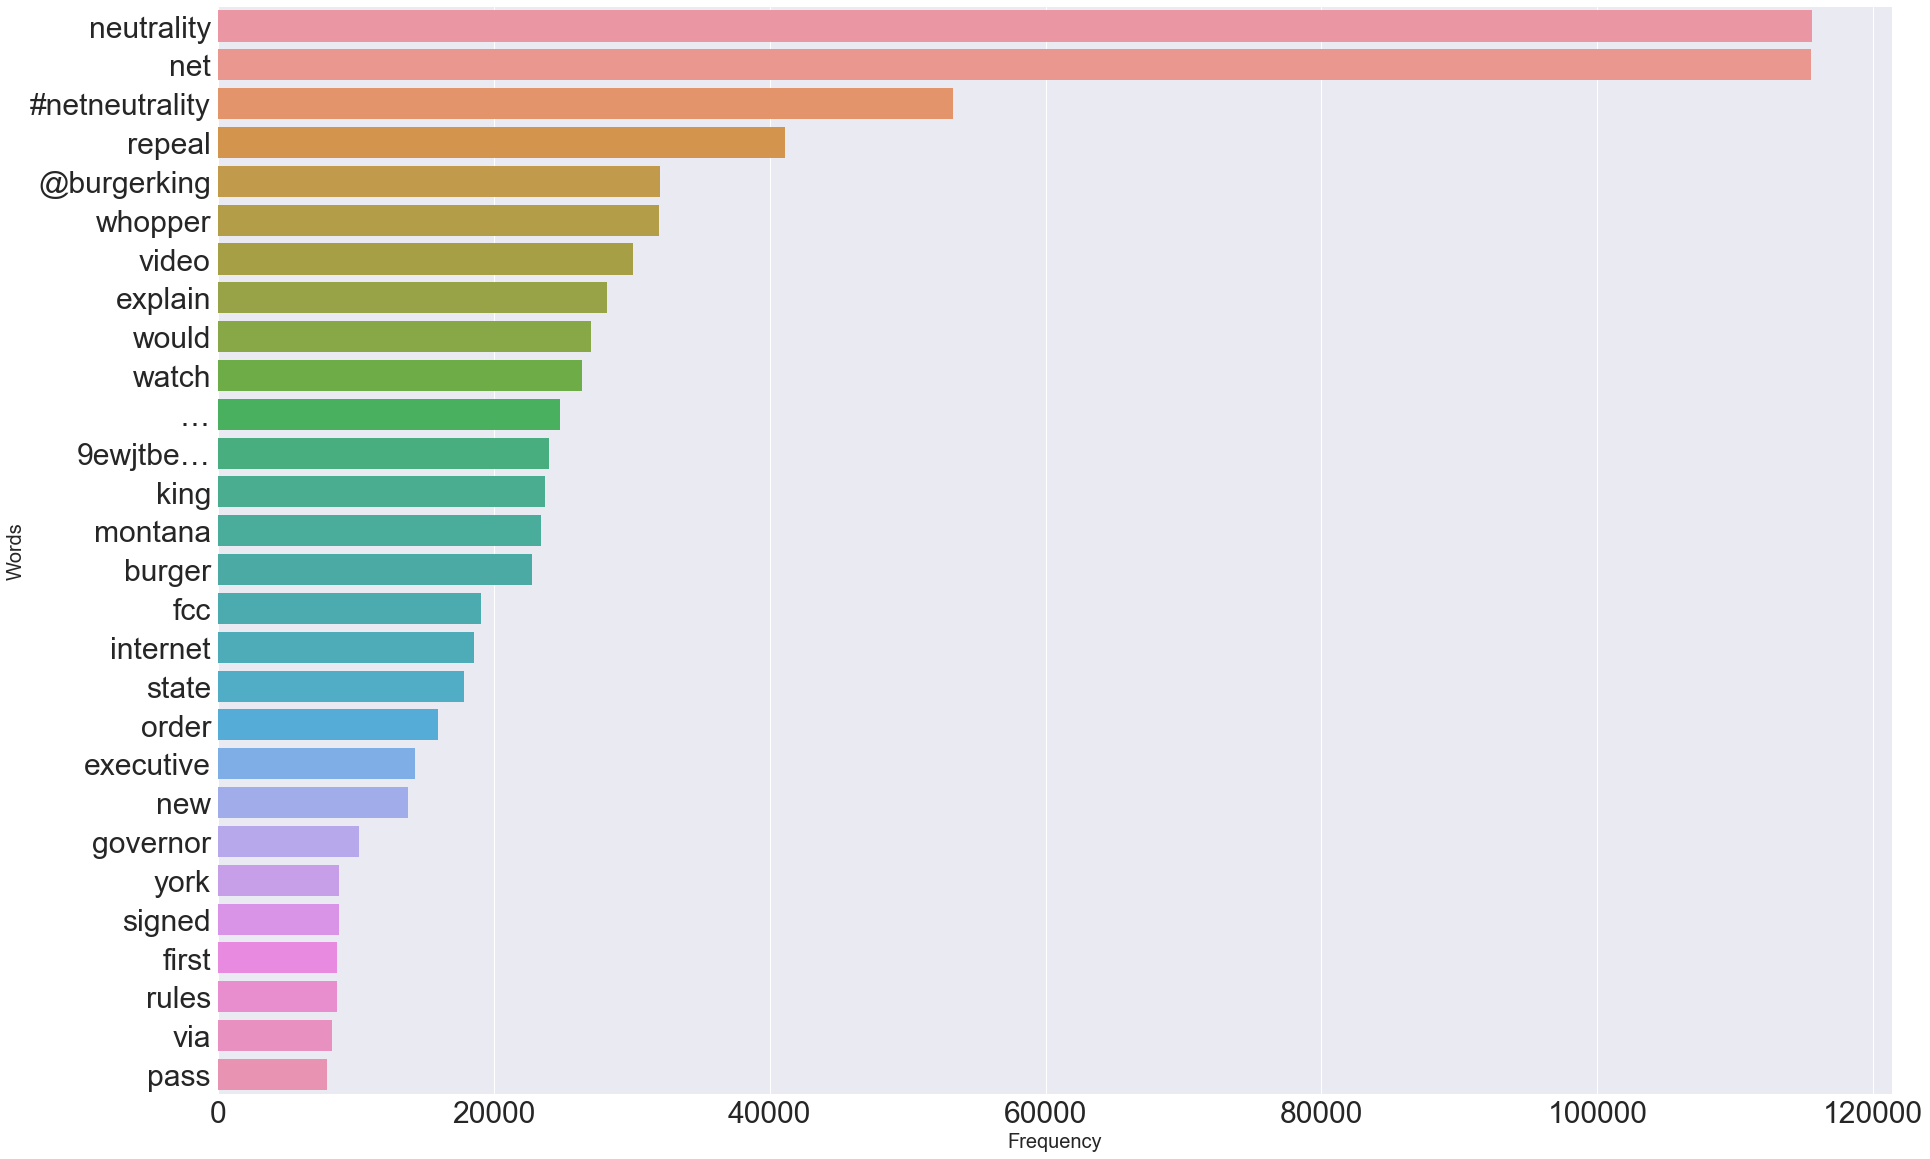

In [42]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x='Frequency', data=rslt)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

In [ ]:
from mpl_toolkits.basemap import Basemap
 
# plot the blank world map
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)
 
plt.show()